# SRTM Product Showcase

* **Products used:** 
[srtm_google](https://developers.google.com/earth-engine/datasets/catalog/CGIAR_SRTM90_V4) ([original source](http://srtm.csi.cgiar.org/))
* Dataset from 11-Feb-2000

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import sys
import os
sys.path.append(os.environ.get('NOTEBOOK_ROOT'))

%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy.ndimage import convolve

### Define Methods

**slope_pct**
* `dem`: The DEM product to use for slope map calculation.
* `resolution`: The resolution of the supplied DEM product.

In [2]:
def slope_pct(dem, resolution):
    # Kernel for rate of elevation change in x-axis.
    dx_kernel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])
    # Kernel for rate of elevation change in y-axis.
    dy_kernel = np.array([[1, 2, 1],
                          [0, 0, 0],
                          [-1, -2, -1]])
    # Rate of change calculations for each axis.
    dx = convolve(dem, dx_kernel) / (8 * resolution)
    dy = convolve(dem, dy_kernel) / (8 * resolution)
    # Return rise/run * 100 for slope percent.
    return np.sqrt(np.square(dx) + np.square(dy)) * 100

### Connect to the datacube

In [3]:
dc = datacube.Datacube(app='SRTM_Product_Showcase')

### Set Analysis Region

In [4]:
product = "srtm_google" 

# Mtera Reservoir - Tanzania
# latitude = (-7.22, -6.80) 
# longitude = (35.60, 36.00) 

# Lake Ilopango, El Salvador 
latitude = (13.6099, 13.7391)
longitude = (-89.1046, -88.9799)

# Lake Sulunga, Tanzania
# latitude = (-6.2936, -5.8306 ) 
# longitude = (34.9943, 35.3624 ) 

In [5]:
srtm_dataset = dc.load(product=product,latitude=latitude,longitude=longitude).isel(time=0)

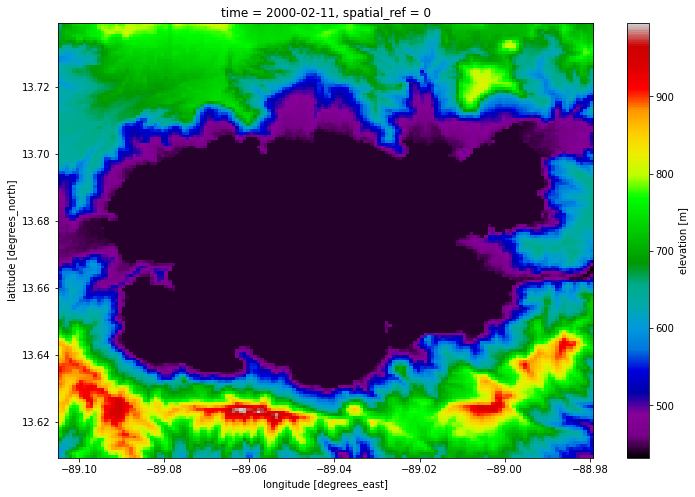

In [6]:
srtm_dataset.elevation.plot.imshow(cmap=plt.cm.nipy_spectral, size=8);

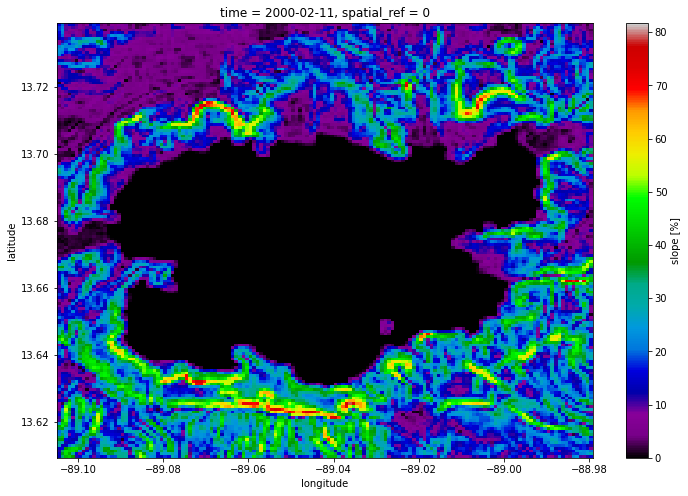

In [7]:
attrs = srtm_dataset.elevation.attrs.copy(); attrs.update(units='%')
srtm_dataset['slope'] = xr.DataArray(slope_pct(srtm_dataset.elevation,
                                               srtm_dataset.geobox.resolution[1]*(1.1132/0.00001)),
                                     dims=dict(srtm_dataset.dims),
                                     attrs=attrs)
srtm_dataset.slope.plot.imshow(cmap=plt.cm.nipy_spectral, size=8);